In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os, json
from os.path import dirname
from pandas import DataFrame, concat
from tqdm import tqdm
import seaborn as sns 


from parse_pgng import get_data as get_pgng


In [28]:
dir = '../data/data_july_24/'
pgng_files = glob('{}s*_pgng_*[0-9].json'.format(dir))
pgng_data = get_pgng(pgng_files, 22)

In [29]:
particiapnts_df = pd.read_csv('participants.csv', sep=",")  
valid_PGNG_participants = particiapnts_df[(particiapnts_df['PGNG_1']==True)& (particiapnts_df['PGNG_2']==True)& (particiapnts_df['VALID']==True)].participant_id.to_numpy()

In [31]:
pgng_data.subject = pgng_data.subject.astype(int)

In [33]:
pgng_data_valid = pgng_data[pgng_data.subject.isin(valid_PGNG_participants)]

In [34]:
pgng_data_valid

,subject,block,trial,runsheet,exposure,stimulus,valence,action,robot,rune,rune_set,correct,choice,rt,accuracy,sham,outcome,total_keys
0,113,1,1,0,1,2,win,go,gw,M,bacs1,1,0,NaN,0,1.0,10+,0
1,113,1,2,0,1,17,lose,no-go,ngal,P,bacs1,0,0,NaN,1,0.0,0,0
2,113,1,3,0,1,1,win,go,gw,H,bacs1,1,1,0.469,1,0.0,10+,1
3,113,1,4,0,1,9,win,no-go,ngw,Y,bacs1,0,1,1.092,0,0.0,0,1
4,113,1,5,0,2,1,win,go,gw,H,bacs1,1,1,0.732,1,0.0,10+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,133,2,236,0,11,9,win,no-go,ngw,R,bacs1,0,1,1.026,0,1.0,10+,1
236,133,2,237,0,12,9,win,no-go,ngw,R,bacs1,0,1,0.943,0,1.0,10+,1
237,133,2,238,0,10,7,win,no-go,ngw,J,bacs1,0,1,0.773,0,1.0,10+,1
238,133,2,239,0,14,20,lose,no-go,ngal,E,bacs1,0,1,1.035,0,1.0,0,1


In [37]:
pgng_data

,subject,block,trial,runsheet,exposure,stimulus,valence,action,robot,rune,rune_set,correct,choice,rt,accuracy,sham,outcome,total_keys
0,107,1,1,0,1,27,win,no-go,ngw,Z,bacs2,0,0,NaN,1,1.0,0,1
1,107,1,2,0,1,36,lose,no-go,ngal,W,bacs2,0,1,0.452,0,0.0,10-,1
2,107,1,3,0,1,22,win,go,gw,X,bacs2,1,1,0.690,1,0.0,10+,1
3,107,1,4,0,1,38,lose,no-go,ngal,J,bacs2,0,0,NaN,1,0.0,0,0
4,107,1,5,0,2,27,win,no-go,ngw,Z,bacs2,0,1,0.512,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,133,2,236,0,11,9,win,no-go,ngw,R,bacs1,0,1,1.026,0,1.0,10+,1
236,133,2,237,0,12,9,win,no-go,ngw,R,bacs1,0,1,0.943,0,1.0,10+,1
237,133,2,238,0,10,7,win,no-go,ngw,J,bacs1,0,1,0.773,0,1.0,10+,1
238,133,2,239,0,14,20,lose,no-go,ngal,E,bacs1,0,1,1.035,0,1.0,0,1


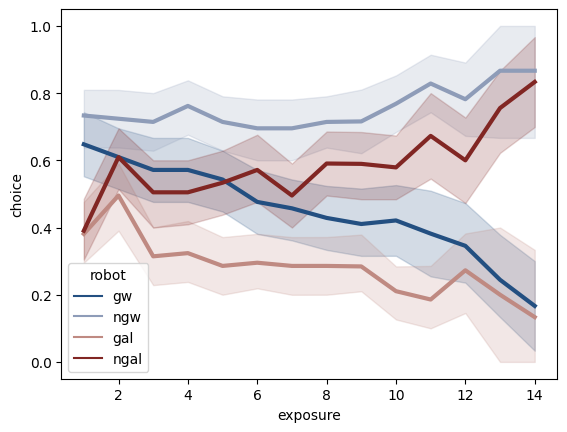

In [36]:

pgng_data.choice.replace({" ":1}, inplace=True)
## Initialize canvas.

## Define aesthetics.
palette = ['#234f81', '#8e9cb8', '#bf8a82', '#812623']
hue_order = ['gw','ngw','gal','ngal']

## Plot learning curves.
g = sns.lineplot(data=pgng_data, x='exposure', 
                 y='choice', hue='robot', 
                 hue_order=hue_order, 
                 palette=palette, 
      lw=3, errorbar=('ci', 95))



In [14]:

# fig, ax = plt.subplots(6,1, figsize=(5,15))
# for i, sub in enumerate(sorted(set(pgng_data.subject))):

#     g = sns.lineplot(data=pgng_data[pgng_data.subject==sub], x='exposure', 
#                  y='choice', hue='robot', 
#                  hue_order=hue_order, 
#                  palette=palette, legend=False,
#     lw=3, errorbar=('ci', 95), ax=ax[i])
     

#     g.set_title(sub)

#     # leg = g.legend()

 
# plt.tight_layout()



<AxesSubplot: >

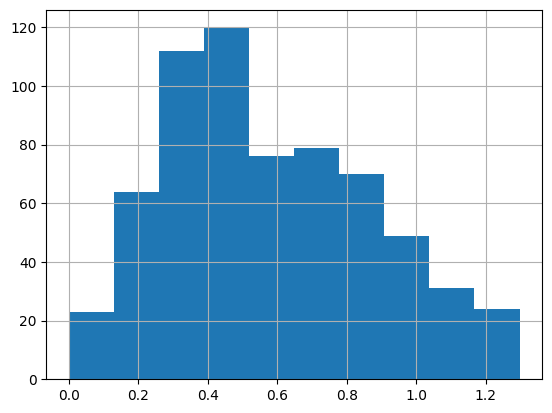

In [8]:
pgng_data.rt.hist()

/var/folders/f7/jcqxh9dj3tv469cncv9966q40000gn/T/ipykernel_35600/2245945844.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.histplot(data=pgng_data[pgng_data.subject==sub], x='rt',
/var/folders/f7/jcqxh9dj3tv469cncv9966q40000gn/T/ipykernel_35600/2245945844.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.histplot(data=pgng_data[pgng_data.subject==sub], x='rt',
/var/folders/f7/jcqxh9dj3tv469cncv9966q40000gn/T/ipykernel_35600/2245945844.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.histplot(data=pgng_data[pgng_data.subject==sub], x='rt',
/var/folders/f7/jcqxh9dj3tv469cncv9966q40000gn/T/ipykernel_35600/2245945844.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.histplot(data=pgng_data[pgng_data.subject==sub], x='rt',
/var/folders/f7/jcqxh9dj3tv469cncv9966q40000gn/T/ipykernel_35600/2245945844.py:4: UserWarning: I

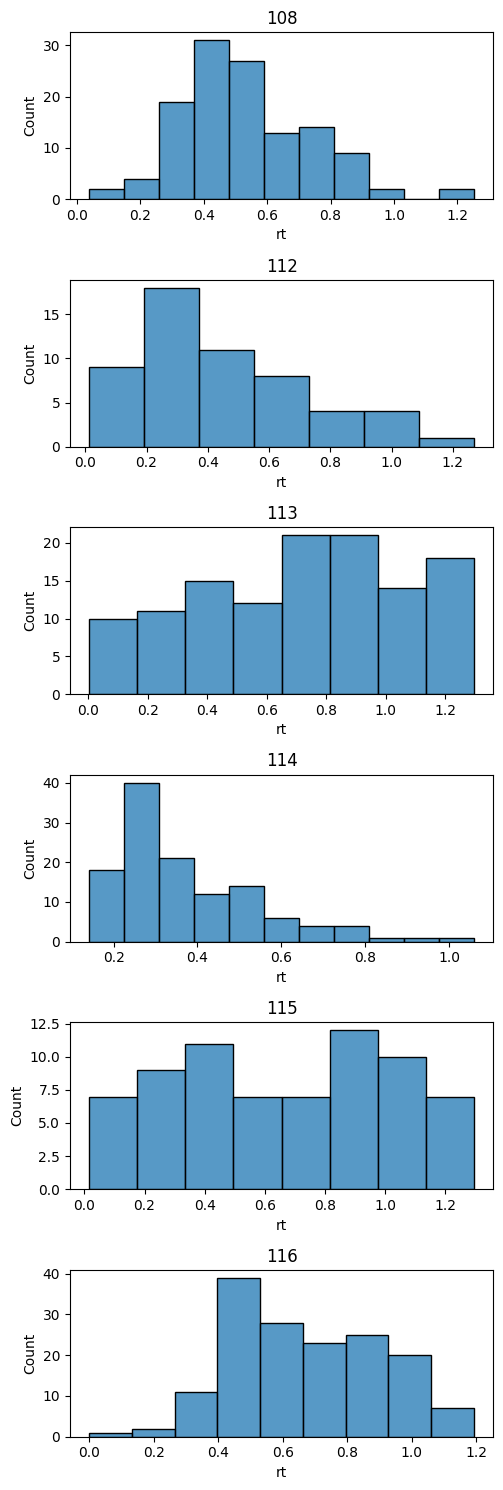

In [11]:

fig, ax = plt.subplots(6,1, figsize=(5,15))
for i, sub in enumerate(sorted(set(pgng_data.subject))):

    g = sns.histplot(data=pgng_data[pgng_data.subject==sub], x='rt', 
                 palette=palette, legend=False, ax=ax[i])
     

    g.set_title(sub)

    # leg = g.legend()

 
plt.tight_layout()
